#Information


TUGAS 1 - ADVANCE DEEP LEARNING

NIM : 14230018

NAMA : ILHAM MAULANA


Link Collab : https://colab.research.google.com/drive/1K6xZbYdRAE7_QhEOlhq4zNqBAiZXI_XJ?usp=sharing

Laporan : https://docs.google.com/document/d/1xYNUiVXY-jPQIBeP3bgkzJPTSXdF_Kyns9kOgp88i4o/edit?usp=sharing

## Dataset Cumida

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.activations import relu
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings;
warnings.filterwarnings('ignore');

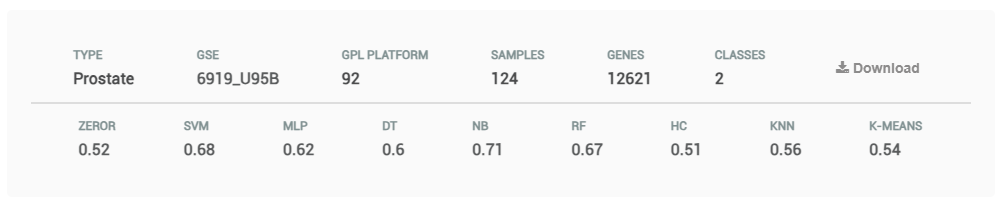

https://sbcb.inf.ufrgs.br/cumida


https://sbcb.inf.ufrgs.br/data/cumida/Genes/Prostate/GSE6919_U95B/Prostate_GSE6919_U95B.csv

In [2]:
# Step 1: Load Data from CSV
df = pd.read_csv('https://raw.githubusercontent.com/k4ilham/dataset/main/Prostate_GSE6919_U95B.csv')

In [3]:
df.head(10)

,samples,type,41880_at,41881_at,41882_at,41883_at,41884_at,41885_at,41886_r_at,41887_at,...,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at
0,GSM152992.CEL,primary_prostate_tumor,2.414076,4.113824,2.035911,3.102248,2.115578,1.775455,6.107839,2.160168,...,2.955998,2.910953,2.095267,1.617076,2.060144,1.962483,1.919590,2.034229,3.013061,2.208421
1,GSM152993.CEL,primary_prostate_tumor,2.385157,4.078664,2.123064,3.087631,2.254190,1.815183,5.708878,2.134447,...,3.196521,2.975412,2.249950,1.757867,2.352185,2.054990,1.970140,1.768459,4.701207,2.513560
2,GSM152994.CEL,primary_prostate_tumor,2.295522,4.085505,2.144344,3.071539,2.229422,1.985899,5.679248,2.100443,...,2.929904,2.857025,2.047436,1.625339,2.065674,1.955286,1.768858,1.666836,3.115166,2.136760
3,GSM152995.CEL,primary_prostate_tumor,2.260478,4.466391,2.206410,3.505265,2.605014,1.887307,5.935039,2.261295,...,3.578538,3.420946,2.736342,1.940826,2.713500,2.363843,2.194837,1.981020,3.141350,2.550041
4,GSM152996.CEL,primary_prostate_tumor,2.229731,4.291435,2.506255,3.220628,2.404673,1.886664,5.965917,2.274317,...,3.558184,3.083316,2.562048,1.923414,2.775842,2.323899,2.288732,2.772796,2.848256,2.803264
5,GSM152997.CEL,primary_prostate_tumor,2.323719,4.042794,2.219460,3.030761,2.539964,1.836586,5.970438,1.880250,...,3.442099,3.239850,2.373556,1.973410,2.563835,2.172953,1.635655,1.885491,2.978715,2.603510
6,GSM152998.CEL,primary_prostate_tumor,2.557032,4.196903,2.122405,3.495034,2.353686,2.100858,6.338756,2.019285,...,3.542867,3.178389,2.413796,2.038962,2.723099,2.359402,2.495400,2.365220,4.338475,3.266788
7,GSM152999.CEL,primary_prostate_tumor,2.441765,4.148545,1.968985,3.230116,2.240704,1.896051,6.166129,2.012576,...,3.363998,3.314865,2.345718,1.927122,2.600874,2.354630,2.256550,2.220849,3.935853,2.800777
8,GSM153000.CEL,primary_prostate_tumor,2.604707,4.234341,2.167552,3.394769,2.294088,2.089270,6.190621,2.030608,...,3.703331,3.263648,2.769345,2.183191,2.621211,2.543716,2.483545,2.353530,3.504419,2.823459
9,GSM153001.CEL,primary_prostate_tumor,2.364670,4.183144,1.866217,3.169024,2.371755,1.983816,5.748455,2.142535,...,3.077640,3.048728,2.230446,1.928804,2.466815,2.228590,2.063278,2.016133,2.955133,2.590789


In [4]:
X = df.drop(df.columns[[0, 1]], axis=1)
y = df['type']

In [5]:
df.isnull().sum().sum()

0

In [6]:
# Encoding label menjadi angka menggunakan LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [7]:
# Bagi data menjadi data pelatihan, validasi, dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape)

(79, 12620)


In [8]:
# Normalisasi data
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)

# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [9]:
# Membuat DataFrame kosong untuk menyimpan hasil evaluasi
results_df = pd.DataFrame(columns=['Optimizer', 'Hidden Layers', 'Validation Accuracy', 'Test Accuracy'])

# Fungsi untuk menambahkan atau memperbarui nilai dalam DataFrame
def update_results(optimizer, hidden_layers, val_acc, test_acc):
    global results_df
    # Mencari baris yang sesuai dengan kombinasi optimizer dan hidden layers
    mask = (results_df['Optimizer'] == optimizer) & (results_df['Hidden Layers'] == hidden_layers)
    # Jika kombinasi sudah ada, update nilai
    if mask.any():
        results_df.loc[mask, ['Validation Accuracy', 'Test Accuracy']] = val_acc, test_acc
    # Jika kombinasi belum ada, tambahkan baris baru
    else:
        results_df = pd.concat([results_df, pd.DataFrame({'Optimizer': [optimizer],
                                                          'Hidden Layers': [hidden_layers],
                                                          'Validation Accuracy': [val_acc],
                                                          'Test Accuracy': [test_acc]})],
                                ignore_index=True)

## 1. Membangun 4 DNN

### 1.A. Hidden layer 1: 1000 neurons, ReLU activation

In [10]:
# Function to build the DNN model with one hidden layer
def build_model_one_hidden():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(1000, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Hidden layer with 1000 neurons and ReLU activation
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='sigmoid')          # Output layer with sigmoid activation
    ])
    return model

### 1.B. Hidden layer 2: 500 neurons, ReLU activation

In [11]:
# Function to build the DNN model with two hidden layer
def build_model_two_hidden():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(500, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # 1st hidden layer with 500 neurons and ReLU activation
        tf.keras.layers.Dense(500, activation='relu'),                                   # 2nd hidden layer with 500 neurons and ReLU activation
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='sigmoid')         # Output layer with sigmoid activation
    ])
    return model

### 1.C. Hidden layer 3: 250 neurons, ReLU activation

In [12]:
# Function to build the DNN model with three hidden layer
def build_model_three_hidden():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(250, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # First hidden layer with 250 neurons and ReLU activation
        tf.keras.layers.Dense(250, activation='relu'),                                   # Second hidden layer with 250 neurons and ReLU activation
        tf.keras.layers.Dense(250, activation='relu'),                                   # Third hidden layer with 250 neurons and ReLU activation
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='sigmoid')         # Output layer with sigmoid activation
    ])
    return model

### 1.D. Hidden layer 4: 100 neurons, ReLU activation

In [13]:
# Function to build the DNN model with four hidden layer
def build_model_four_hidden():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # First hidden layer with 100 neurons and ReLU activation
        tf.keras.layers.Dense(100, activation='relu'),                                   # Second hidden layer with 100 neurons and ReLU activation
        tf.keras.layers.Dense(100, activation='relu'),                                   # Third hidden layer with 100 neurons and ReLU activation
        tf.keras.layers.Dense(100, activation='relu'),                                   # Fourth hidden layer with 100 neurons and ReLU activation
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='sigmoid')         # Output layer with sigmoid activation
    ])
    return model

In [14]:
# Build the DNN model
model_one_hidden_layer = build_model_one_hidden()
model_two_hidden_layer = build_model_two_hidden()
model_three_hidden_layer = build_model_three_hidden()
model_four_hidden_layer = build_model_four_hidden()

### 1.E. Optimizer: SGD

#### Train and evaluate the model with 1 hidden Layer

In [15]:
# Melatih model dengan data pelatihan
# optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=0.01)  # Define the optimizer with learning rate
%%time
model_one_hidden_layer.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_one_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 3s 254ms/step - loss: 2.1317 - accuracy: 0.4937 - val_loss: 0.8953 - val_accuracy: 0.8000
Epoch 2/100
8/8 [==============================] - 1s 133ms/step - loss: 0.2631 - accuracy: 0.8987 - val_loss: 1.3083 - val_accuracy: 0.6000
Epoch 3/100
8/8 [==============================] - 1s 156ms/step - loss: 0.0883 - accuracy: 0.9747 - val_loss: 1.0391 - val_accuracy: 0.7000
Epoch 4/100
8/8 [==============================] - 1s 165ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.0367 - val_accuracy: 0.7000
Epoch 5/100
8/8 [==============================] - 2s 199ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.0354 - val_accuracy: 0.6500
Epoch 6/100
8/8 [==============================] - 2s 235ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.0342 - val_accuracy: 0.6500
Epoch 7/100
8/8 [==============================] - 1s 154ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.0339 - val_accuracy: 0.6500
Epoch 8/100
8

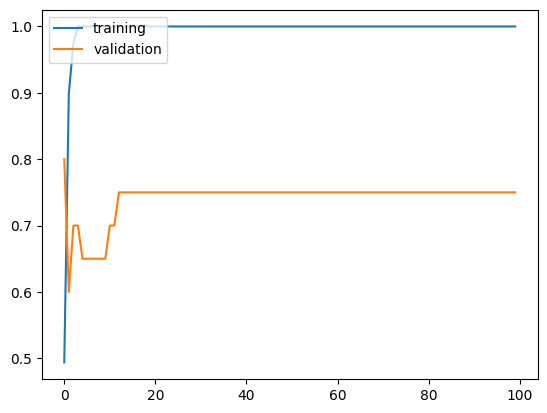

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [17]:
# Ambil loss dari history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)



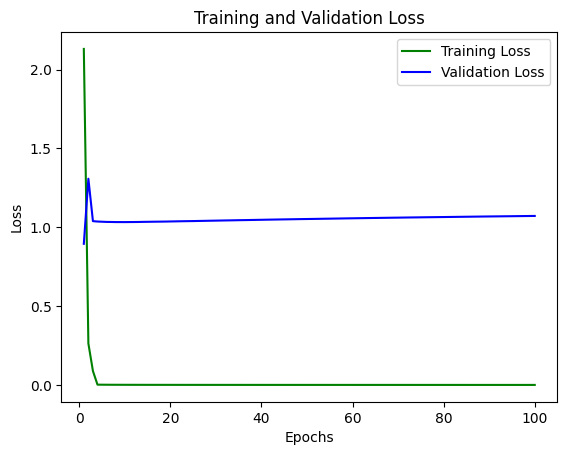

In [18]:
# Plot kurva loss
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_one_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_one_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)


1/1 [==============================] - 0s 155ms/step - loss: 1.0721 - accuracy: 0.7500
Model Validation Accuracy: 0.75
1/1 [==============================] - 0s 49ms/step - loss: 1.6707 - accuracy: 0.6400
Best Model Test Accuracy: 0.6399999856948853


In [20]:
results = model_one_hidden_layer.evaluate(X_test, y_test)

1/1 [==============================] - 0s 43ms/step - loss: 1.6707 - accuracy: 0.6400


In [21]:
update_results('SGD', 1, val_acc, test_acc)
print(results_df)

  Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0       SGD             1                 0.75           0.64


#### Train and evaluate the model with 2 hidden Layer

In [22]:
# Melatih model dengan data pelatihan
model_two_hidden_layer.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_two_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 72ms/step - loss: 0.9201 - accuracy: 0.5823 - val_loss: 0.7521 - val_accuracy: 0.6500
Epoch 2/100
8/8 [==============================] - 0s 33ms/step - loss: 0.0694 - accuracy: 0.9873 - val_loss: 0.7501 - val_accuracy: 0.7500
Epoch 3/100
8/8 [==============================] - 0s 43ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.7552 - val_accuracy: 0.7500
Epoch 4/100
8/8 [==============================] - 0s 37ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.7597 - val_accuracy: 0.7500
Epoch 5/100
8/8 [==============================] - 0s 40ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.7656 - val_accuracy: 0.7500
Epoch 6/100
8/8 [==============================] - 0s 39ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.7702 - val_accuracy: 0.7500
Epoch 7/100
8/8 [==============================] - 0s 33ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.7746 - val_accuracy: 0.7500
Epoch 8/100
8/8 [===

In [23]:
# Ambil loss dari history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

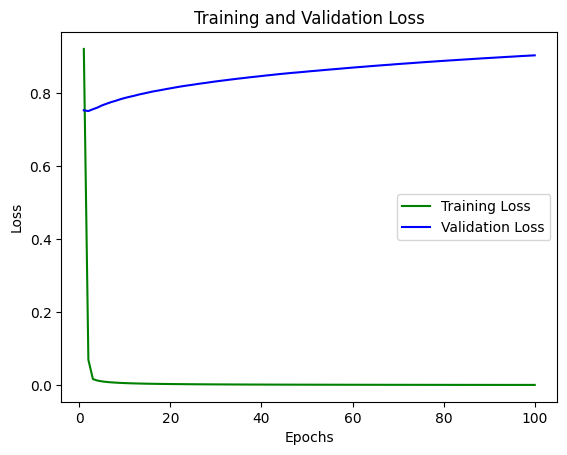

In [24]:
# Plot kurva loss
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_two_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 2 Hidden Layer SGD Optimizer Validation Accuracy:", val_acc)

# 5. Pilih model terbaik berdasarkan kinerja validasi
best_model = model_two_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik

# 6. Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 142ms/step - loss: 0.9026 - accuracy: 0.7500
Model 2 Hidden Layer SGD Optimizer Validation Accuracy: 0.75
1/1 [==============================] - 0s 62ms/step - loss: 0.6905 - accuracy: 0.6400
Best Model Test Accuracy: 0.6399999856948853


In [26]:
update_results('SGD', 2, val_acc, test_acc)
print(results_df)

  Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0       SGD             1                 0.75           0.64
1       SGD             2                 0.75           0.64


#### Train and evaluate the model with 3 hidden Layer

In [27]:
# Melatih model dengan data pelatihan
model_three_hidden_layer.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_three_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 65ms/step - loss: 0.6881 - accuracy: 0.5316 - val_loss: 0.6089 - val_accuracy: 0.7000
Epoch 2/100
8/8 [==============================] - 0s 31ms/step - loss: 0.1825 - accuracy: 0.9747 - val_loss: 0.5700 - val_accuracy: 0.7000
Epoch 3/100
8/8 [==============================] - 0s 32ms/step - loss: 0.0953 - accuracy: 1.0000 - val_loss: 0.5622 - val_accuracy: 0.7000
Epoch 4/100
8/8 [==============================] - 0s 31ms/step - loss: 0.0638 - accuracy: 1.0000 - val_loss: 0.5647 - val_accuracy: 0.7000
Epoch 5/100
8/8 [==============================] - 0s 24ms/step - loss: 0.0472 - accuracy: 1.0000 - val_loss: 0.5680 - val_accuracy: 0.7000
Epoch 6/100
8/8 [==============================] - 0s 18ms/step - loss: 0.0371 - accuracy: 1.0000 - val_loss: 0.5722 - val_accuracy: 0.7000
Epoch 7/100
8/8 [==============================] - 0s 19ms/step - loss: 0.0305 - accuracy: 1.0000 - val_loss: 0.5752 - val_accuracy: 0.7000
Epoch 8/100
8/8 [===

In [28]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_three_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 3 Hidden Layer SGD Optimizer Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_three_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik

# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 170ms/step - loss: 0.7800 - accuracy: 0.7000
Model 3 Hidden Layer SGD Optimizer Validation Accuracy: 0.699999988079071
1/1 [==============================] - 0s 31ms/step - loss: 0.7084 - accuracy: 0.6800
Best Model Test Accuracy: 0.6800000071525574


In [29]:
update_results('SGD', 3, val_acc, test_acc)
print(results_df)

  Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0       SGD             1                 0.75           0.64
1       SGD             2                 0.75           0.64
2       SGD             3                 0.70           0.68


#### Train and evaluate the model with 4 hidden Layer

In [30]:
# Melatih model dengan data pelatihan
model_four_hidden_layer.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_four_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 35ms/step - loss: 0.6447 - accuracy: 0.6076 - val_loss: 0.6271 - val_accuracy: 0.7000
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 0.2996 - accuracy: 0.9241 - val_loss: 0.6289 - val_accuracy: 0.7000
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 0.1756 - accuracy: 1.0000 - val_loss: 0.6614 - val_accuracy: 0.6500
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 0.1091 - accuracy: 1.0000 - val_loss: 0.6825 - val_accuracy: 0.6500
Epoch 5/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0740 - accuracy: 1.0000 - val_loss: 0.7090 - val_accuracy: 0.6500
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0537 - accuracy: 1.0000 - val_loss: 0.7246 - val_accuracy: 0.6500
Epoch 7/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0414 - accuracy: 1.0000 - val_loss: 0.7523 - val_accuracy: 0.6500
Epoch 8/100
8/8 [===

In [31]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_four_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 3 Hidden Layer SGD Optimizer Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_four_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik

# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 150ms/step - loss: 1.2117 - accuracy: 0.7000
Model 3 Hidden Layer SGD Optimizer Validation Accuracy: 0.699999988079071
1/1 [==============================] - 0s 29ms/step - loss: 1.1738 - accuracy: 0.6400
Best Model Test Accuracy: 0.6399999856948853


In [32]:
update_results('SGD', 4, val_acc, test_acc)
print(results_df)

  Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0       SGD             1                 0.75           0.64
1       SGD             2                 0.75           0.64
2       SGD             3                 0.70           0.68
3       SGD             4                 0.70           0.64


## 2. Mengganti Optimizer

### 2.A Adam

#### Train and evaluate the model with 1 hidden Layer with Adam Optimizer

In [33]:
# Melatih model dengan data pelatihan
# optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.001)  # Define the optimizer with learning rate
model_one_hidden_layer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_one_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 2s 237ms/step - loss: 4.7212 - accuracy: 0.7342 - val_loss: 11.3002 - val_accuracy: 0.6000
Epoch 2/100
8/8 [==============================] - 2s 217ms/step - loss: 7.4855 - accuracy: 0.7848 - val_loss: 11.7077 - val_accuracy: 0.6000
Epoch 3/100
8/8 [==============================] - 2s 248ms/step - loss: 1.7129 - accuracy: 0.9241 - val_loss: 13.4312 - val_accuracy: 0.6500
Epoch 4/100
8/8 [==============================] - 3s 319ms/step - loss: 2.4939e-04 - accuracy: 1.0000 - val_loss: 18.8343 - val_accuracy: 0.6500
Epoch 5/100
8/8 [==============================] - 2s 215ms/step - loss: 0.1196 - accuracy: 0.9873 - val_loss: 19.9833 - val_accuracy: 0.6500
Epoch 6/100
8/8 [==============================] - 2s 216ms/step - loss: 3.8927e-04 - accuracy: 1.0000 - val_loss: 19.6862 - val_accuracy: 0.6500
Epoch 7/100
8/8 [==============================] - 2s 212ms/step - loss: 2.1414e-04 - accuracy: 1.0000 - val_loss: 19.6455 - val_accuracy: 0

In [34]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_one_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 1 Hidden Layer Adam Optimizer Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_one_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik

# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 144ms/step - loss: 19.6353 - accuracy: 0.7000
Model 1 Hidden Layer Adam Optimizer Validation Accuracy: 0.699999988079071
1/1 [==============================] - 0s 49ms/step - loss: 19.2272 - accuracy: 0.6000
Best Model Test Accuracy: 0.6000000238418579


In [35]:
update_results('ADAM', 1, val_acc, test_acc)
print(results_df)

  Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0       SGD             1                 0.75           0.64
1       SGD             2                 0.75           0.64
2       SGD             3                 0.70           0.68
3       SGD             4                 0.70           0.64
4      ADAM             1                 0.70           0.60


#### Train and evaluate the model with 2 hidden Layer with Adam Optimizer

In [36]:
# Melatih model dengan data pelatihan
model_two_hidden_layer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_two_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 102ms/step - loss: 2.4223 - accuracy: 0.7468 - val_loss: 2.6559 - val_accuracy: 0.7000
Epoch 2/100
8/8 [==============================] - 1s 75ms/step - loss: 1.1013 - accuracy: 0.8608 - val_loss: 3.3123 - val_accuracy: 0.7000
Epoch 3/100
8/8 [==============================] - 1s 81ms/step - loss: 0.7273 - accuracy: 0.9494 - val_loss: 4.5205 - val_accuracy: 0.6500
Epoch 4/100
8/8 [==============================] - 1s 82ms/step - loss: 1.1750 - accuracy: 0.8987 - val_loss: 12.7009 - val_accuracy: 0.7000
Epoch 5/100
8/8 [==============================] - 1s 76ms/step - loss: 0.5707 - accuracy: 0.9620 - val_loss: 9.7664 - val_accuracy: 0.6500
Epoch 6/100
8/8 [==============================] - 1s 118ms/step - loss: 0.5264 - accuracy: 0.9747 - val_loss: 11.9333 - val_accuracy: 0.6500
Epoch 7/100
8/8 [==============================] - 1s 113ms/step - loss: 0.5949 - accuracy: 0.9620 - val_loss: 16.2812 - val_accuracy: 0.7000
Epoch 8/100
8/

In [37]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_two_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 2 Hidden Layer Adam Optimizer Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_two_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik

# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 145ms/step - loss: 11.3903 - accuracy: 0.7500
Model 2 Hidden Layer Adam Optimizer Validation Accuracy: 0.75
1/1 [==============================] - 0s 37ms/step - loss: 19.7588 - accuracy: 0.6400
Best Model Test Accuracy: 0.6399999856948853


In [38]:
update_results('ADAM', 2, val_acc, test_acc)
print(results_df)

  Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0       SGD             1                 0.75           0.64
1       SGD             2                 0.75           0.64
2       SGD             3                 0.70           0.68
3       SGD             4                 0.70           0.64
4      ADAM             1                 0.70           0.60
5      ADAM             2                 0.75           0.64


#### Train and evaluate the model with 3 hidden Layer with Adam Optimizer

In [39]:
# Melatih model dengan data pelatihan
model_three_hidden_layer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_three_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 67ms/step - loss: 2.1586 - accuracy: 0.7595 - val_loss: 3.5777 - val_accuracy: 0.6000
Epoch 2/100
8/8 [==============================] - 0s 38ms/step - loss: 1.7097 - accuracy: 0.7595 - val_loss: 2.3722 - val_accuracy: 0.5500
Epoch 3/100
8/8 [==============================] - 0s 40ms/step - loss: 1.5117 - accuracy: 0.7848 - val_loss: 3.6433 - val_accuracy: 0.8000
Epoch 4/100
8/8 [==============================] - 0s 42ms/step - loss: 0.4288 - accuracy: 0.9241 - val_loss: 4.8672 - val_accuracy: 0.7500
Epoch 5/100
8/8 [==============================] - 0s 38ms/step - loss: 0.1004 - accuracy: 0.9620 - val_loss: 4.2492 - val_accuracy: 0.6500
Epoch 6/100
8/8 [==============================] - 0s 38ms/step - loss: 0.0135 - accuracy: 0.9873 - val_loss: 4.5121 - val_accuracy: 0.5500
Epoch 7/100
8/8 [==============================] - 0s 40ms/step - loss: 1.4247e-04 - accuracy: 1.0000 - val_loss: 4.8083 - val_accuracy: 0.6000
Epoch 8/100
8/8 

In [40]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_three_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 3 Hidden Layer Adam Optimizer Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_three_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik

# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 148ms/step - loss: 5.0217 - accuracy: 0.6500
Model 3 Hidden Layer Adam Optimizer Validation Accuracy: 0.6499999761581421
1/1 [==============================] - 0s 35ms/step - loss: 6.8095 - accuracy: 0.5600
Best Model Test Accuracy: 0.5600000023841858


In [41]:
update_results('ADAM', 3, val_acc, test_acc)
print(results_df)

  Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0       SGD             1                 0.75           0.64
1       SGD             2                 0.75           0.64
2       SGD             3                 0.70           0.68
3       SGD             4                 0.70           0.64
4      ADAM             1                 0.70           0.60
5      ADAM             2                 0.75           0.64
6      ADAM             3                 0.65           0.56


#### Train and evaluate the model with 4 hidden Layer with Adam Optimizer

In [42]:
# Melatih model dengan data pelatihan
model_four_hidden_layer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_four_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 45ms/step - loss: 1.0040 - accuracy: 0.7975 - val_loss: 3.2403 - val_accuracy: 0.6500
Epoch 2/100
8/8 [==============================] - 0s 19ms/step - loss: 0.7661 - accuracy: 0.8608 - val_loss: 1.7280 - val_accuracy: 0.7000
Epoch 3/100
8/8 [==============================] - 0s 21ms/step - loss: 0.3849 - accuracy: 0.8987 - val_loss: 2.1847 - val_accuracy: 0.8000
Epoch 4/100
8/8 [==============================] - 0s 21ms/step - loss: 0.5197 - accuracy: 0.9241 - val_loss: 2.6424 - val_accuracy: 0.7500
Epoch 5/100
8/8 [==============================] - 0s 21ms/step - loss: 0.0419 - accuracy: 0.9747 - val_loss: 3.2072 - val_accuracy: 0.7000
Epoch 6/100
8/8 [==============================] - 0s 21ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 3.1235 - val_accuracy: 0.7000
Epoch 7/100
8/8 [==============================] - 0s 21ms/step - loss: 0.0150 - accuracy: 0.9873 - val_loss: 3.5879 - val_accuracy: 0.7000
Epoch 8/100
8/8 [===

In [43]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_four_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 4 Hidden Layer Adam Optimizer Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_four_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik

# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 159ms/step - loss: 4.5917 - accuracy: 0.7500
Model 4 Hidden Layer Adam Optimizer Validation Accuracy: 0.75
1/1 [==============================] - 0s 31ms/step - loss: 5.2001 - accuracy: 0.4800
Best Model Test Accuracy: 0.47999998927116394


In [44]:
update_results('ADAM', 4, val_acc, test_acc)
print(results_df)

  Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0       SGD             1                 0.75           0.64
1       SGD             2                 0.75           0.64
2       SGD             3                 0.70           0.68
3       SGD             4                 0.70           0.64
4      ADAM             1                 0.70           0.60
5      ADAM             2                 0.75           0.64
6      ADAM             3                 0.65           0.56
7      ADAM             4                 0.75           0.48


### 2.B AdaGrad

#### Train and evaluate the model with 1 hidden Layer with AdaGrad Optimizer

In [45]:
# Melatih model dengan data pelatihan
optimizer_adagrad = tf.keras.optimizers.Adagrad()
model_one_hidden_layer.compile(optimizer=optimizer_adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_one_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 2s 204ms/step - loss: 8.2994e-08 - accuracy: 1.0000 - val_loss: 19.6353 - val_accuracy: 0.7000
Epoch 2/100
8/8 [==============================] - 1s 171ms/step - loss: 8.2994e-08 - accuracy: 1.0000 - val_loss: 19.6353 - val_accuracy: 0.7000
Epoch 3/100
8/8 [==============================] - 1s 170ms/step - loss: 8.2994e-08 - accuracy: 1.0000 - val_loss: 19.6353 - val_accuracy: 0.7000
Epoch 4/100
8/8 [==============================] - 1s 165ms/step - loss: 8.2994e-08 - accuracy: 1.0000 - val_loss: 19.6353 - val_accuracy: 0.7000
Epoch 5/100
8/8 [==============================] - 1s 167ms/step - loss: 8.2994e-08 - accuracy: 1.0000 - val_loss: 19.6352 - val_accuracy: 0.7000
Epoch 6/100
8/8 [==============================] - 1s 162ms/step - loss: 8.2994e-08 - accuracy: 1.0000 - val_loss: 19.6352 - val_accuracy: 0.7000
Epoch 7/100
8/8 [==============================] - 2s 262ms/step - loss: 8.2994e-08 - accuracy: 1.0000 - val_loss: 19.6352 -

In [46]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_one_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 1 Hidden Layer AdaGrad Optimizer Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_one_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik

# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 174ms/step - loss: 19.6344 - accuracy: 0.7000
Model 1 Hidden Layer AdaGrad Optimizer Validation Accuracy: 0.699999988079071
1/1 [==============================] - 0s 48ms/step - loss: 19.2263 - accuracy: 0.6000
Best Model Test Accuracy: 0.6000000238418579


In [47]:
update_results('AdaGrad', 1, val_acc, test_acc)
print(results_df)

  Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0       SGD             1                 0.75           0.64
1       SGD             2                 0.75           0.64
2       SGD             3                 0.70           0.68
3       SGD             4                 0.70           0.64
4      ADAM             1                 0.70           0.60
5      ADAM             2                 0.75           0.64
6      ADAM             3                 0.65           0.56
7      ADAM             4                 0.75           0.48
8   AdaGrad             1                 0.70           0.60


#### Train and evaluate the model with 2 hidden Layer with AdaGrad Optimizer

In [48]:
# Melatih model dengan data pelatihan
optimizer_adagrad = tf.keras.optimizers.Adagrad()
model_two_hidden_layer.compile(optimizer=optimizer_adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_two_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 94ms/step - loss: 9.0539e-09 - accuracy: 1.0000 - val_loss: 11.3903 - val_accuracy: 0.7500
Epoch 2/100
8/8 [==============================] - 0s 59ms/step - loss: 9.0539e-09 - accuracy: 1.0000 - val_loss: 11.3903 - val_accuracy: 0.7500
Epoch 3/100
8/8 [==============================] - 1s 65ms/step - loss: 9.0539e-09 - accuracy: 1.0000 - val_loss: 11.3903 - val_accuracy: 0.7500
Epoch 4/100
8/8 [==============================] - 0s 59ms/step - loss: 9.0539e-09 - accuracy: 1.0000 - val_loss: 11.3903 - val_accuracy: 0.7500
Epoch 5/100
8/8 [==============================] - 1s 66ms/step - loss: 9.0539e-09 - accuracy: 1.0000 - val_loss: 11.3903 - val_accuracy: 0.7500
Epoch 6/100
8/8 [==============================] - 1s 96ms/step - loss: 9.0539e-09 - accuracy: 1.0000 - val_loss: 11.3903 - val_accuracy: 0.7500
Epoch 7/100
8/8 [==============================] - 1s 98ms/step - loss: 9.0539e-09 - accuracy: 1.0000 - val_loss: 11.3903 - val_ac

In [49]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_two_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 2 Hidden Layer AdaGrad Optimizer Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_two_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik

# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 157ms/step - loss: 11.3903 - accuracy: 0.7500
Model 2 Hidden Layer AdaGrad Optimizer Validation Accuracy: 0.75
1/1 [==============================] - 0s 37ms/step - loss: 19.7588 - accuracy: 0.6400
Best Model Test Accuracy: 0.6399999856948853


In [50]:
update_results('AdaGrad', 2, val_acc, test_acc)
print(results_df)

  Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0       SGD             1                 0.75           0.64
1       SGD             2                 0.75           0.64
2       SGD             3                 0.70           0.68
3       SGD             4                 0.70           0.64
4      ADAM             1                 0.70           0.60
5      ADAM             2                 0.75           0.64
6      ADAM             3                 0.65           0.56
7      ADAM             4                 0.75           0.48
8   AdaGrad             1                 0.70           0.60
9   AdaGrad             2                 0.75           0.64


#### Train and evaluate the model with 3 hidden Layer with AdaGrad Optimizer

In [51]:
# Melatih model dengan data pelatihan
optimizer_adagrad = tf.keras.optimizers.Adagrad()
model_three_hidden_layer.compile(optimizer=optimizer_adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_three_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 54ms/step - loss: 1.1770e-06 - accuracy: 1.0000 - val_loss: 5.0217 - val_accuracy: 0.6500
Epoch 2/100
8/8 [==============================] - 0s 28ms/step - loss: 1.1770e-06 - accuracy: 1.0000 - val_loss: 5.0217 - val_accuracy: 0.6500
Epoch 3/100
8/8 [==============================] - 0s 31ms/step - loss: 1.1770e-06 - accuracy: 1.0000 - val_loss: 5.0217 - val_accuracy: 0.6500
Epoch 4/100
8/8 [==============================] - 0s 31ms/step - loss: 1.1770e-06 - accuracy: 1.0000 - val_loss: 5.0217 - val_accuracy: 0.6500
Epoch 5/100
8/8 [==============================] - 0s 29ms/step - loss: 1.1770e-06 - accuracy: 1.0000 - val_loss: 5.0217 - val_accuracy: 0.6500
Epoch 6/100
8/8 [==============================] - 0s 29ms/step - loss: 1.1770e-06 - accuracy: 1.0000 - val_loss: 5.0217 - val_accuracy: 0.6500
Epoch 7/100
8/8 [==============================] - 0s 30ms/step - loss: 1.1770e-06 - accuracy: 1.0000 - val_loss: 5.0217 - val_accuracy:

In [52]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_three_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 3 Hidden Layer AdaGrad Optimizer Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_three_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik

# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 153ms/step - loss: 5.0218 - accuracy: 0.6500
Model 3 Hidden Layer AdaGrad Optimizer Validation Accuracy: 0.6499999761581421
1/1 [==============================] - 0s 37ms/step - loss: 6.8103 - accuracy: 0.5600
Best Model Test Accuracy: 0.5600000023841858


In [53]:
update_results('AdaGrad', 3, val_acc, test_acc)
print(results_df)

   Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0        SGD             1                 0.75           0.64
1        SGD             2                 0.75           0.64
2        SGD             3                 0.70           0.68
3        SGD             4                 0.70           0.64
4       ADAM             1                 0.70           0.60
5       ADAM             2                 0.75           0.64
6       ADAM             3                 0.65           0.56
7       ADAM             4                 0.75           0.48
8    AdaGrad             1                 0.70           0.60
9    AdaGrad             2                 0.75           0.64
10   AdaGrad             3                 0.65           0.56


#### Train and evaluate the model with 4 hidden Layer with AdaGrad Optimizer

In [54]:
# Melatih model dengan data pelatihan
optimizer_adagrad = tf.keras.optimizers.Adagrad()
model_four_hidden_layer.compile(optimizer=optimizer_adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_four_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 43ms/step - loss: 2.3856e-06 - accuracy: 1.0000 - val_loss: 4.5917 - val_accuracy: 0.7500
Epoch 2/100
8/8 [==============================] - 0s 15ms/step - loss: 2.3856e-06 - accuracy: 1.0000 - val_loss: 4.5917 - val_accuracy: 0.7500
Epoch 3/100
8/8 [==============================] - 0s 17ms/step - loss: 2.3841e-06 - accuracy: 1.0000 - val_loss: 4.5917 - val_accuracy: 0.7500
Epoch 4/100
8/8 [==============================] - 0s 17ms/step - loss: 2.3826e-06 - accuracy: 1.0000 - val_loss: 4.5917 - val_accuracy: 0.7500
Epoch 5/100
8/8 [==============================] - 0s 15ms/step - loss: 2.3826e-06 - accuracy: 1.0000 - val_loss: 4.5917 - val_accuracy: 0.7500
Epoch 6/100
8/8 [==============================] - 0s 17ms/step - loss: 2.3826e-06 - accuracy: 1.0000 - val_loss: 4.5917 - val_accuracy: 0.7500
Epoch 7/100
8/8 [==============================] - 0s 16ms/step - loss: 2.3811e-06 - accuracy: 1.0000 - val_loss: 4.5917 - val_accuracy:

In [55]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_four_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 4 Hidden Layer AdaGrad Optimizer Validation Accuracy:", val_acc)
# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_four_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik
# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 226ms/step - loss: 4.5930 - accuracy: 0.7500
Model 4 Hidden Layer AdaGrad Optimizer Validation Accuracy: 0.75
1/1 [==============================] - 0s 39ms/step - loss: 5.2078 - accuracy: 0.4800
Best Model Test Accuracy: 0.47999998927116394


In [56]:
update_results('AdaGrad', 4, val_acc, test_acc)
print(results_df)

   Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0        SGD             1                 0.75           0.64
1        SGD             2                 0.75           0.64
2        SGD             3                 0.70           0.68
3        SGD             4                 0.70           0.64
4       ADAM             1                 0.70           0.60
5       ADAM             2                 0.75           0.64
6       ADAM             3                 0.65           0.56
7       ADAM             4                 0.75           0.48
8    AdaGrad             1                 0.70           0.60
9    AdaGrad             2                 0.75           0.64
10   AdaGrad             3                 0.65           0.56
11   AdaGrad             4                 0.75           0.48


### 2.C RMSProp

#### Train and evaluate the model with 1 hidden Layer with RMSProp Optimizer

In [57]:
# Melatih model dengan data pelatihan
optimizer_rmsprop = tf.keras.optimizers.RMSprop()
model_one_hidden_layer.compile(optimizer=optimizer_rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_one_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 3s 219ms/step - loss: 7.9976e-08 - accuracy: 1.0000 - val_loss: 19.6253 - val_accuracy: 0.7000
Epoch 2/100
8/8 [==============================] - 1s 189ms/step - loss: 6.7904e-08 - accuracy: 1.0000 - val_loss: 19.6178 - val_accuracy: 0.7000
Epoch 3/100
8/8 [==============================] - 1s 183ms/step - loss: 5.7341e-08 - accuracy: 1.0000 - val_loss: 19.6116 - val_accuracy: 0.7000
Epoch 4/100
8/8 [==============================] - 1s 185ms/step - loss: 5.1305e-08 - accuracy: 1.0000 - val_loss: 19.6062 - val_accuracy: 0.7000
Epoch 5/100
8/8 [==============================] - 2s 192ms/step - loss: 4.6778e-08 - accuracy: 1.0000 - val_loss: 19.6013 - val_accuracy: 0.7000
Epoch 6/100
8/8 [==============================] - 1s 185ms/step - loss: 4.2251e-08 - accuracy: 1.0000 - val_loss: 19.5970 - val_accuracy: 0.7000
Epoch 7/100
8/8 [==============================] - 2s 215ms/step - loss: 3.9233e-08 - accuracy: 1.0000 - val_loss: 19.5931 -

In [58]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_one_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 1 Hidden Layer RMSprop Optimizer Validation Accuracy:", val_acc)
# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_one_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik
# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 143ms/step - loss: 19.4910 - accuracy: 0.7000
Model 1 Hidden Layer RMSprop Optimizer Validation Accuracy: 0.699999988079071
1/1 [==============================] - 0s 44ms/step - loss: 19.0706 - accuracy: 0.6000
Best Model Test Accuracy: 0.6000000238418579


In [59]:
update_results('RMSprop', 1, val_acc, test_acc)
print(results_df)

   Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0        SGD             1                 0.75           0.64
1        SGD             2                 0.75           0.64
2        SGD             3                 0.70           0.68
3        SGD             4                 0.70           0.64
4       ADAM             1                 0.70           0.60
5       ADAM             2                 0.75           0.64
6       ADAM             3                 0.65           0.56
7       ADAM             4                 0.75           0.48
8    AdaGrad             1                 0.70           0.60
9    AdaGrad             2                 0.75           0.64
10   AdaGrad             3                 0.65           0.56
11   AdaGrad             4                 0.75           0.48
12   RMSprop             1                 0.70           0.60


#### Train and evaluate the model with 2 hidden Layer with RMSProp Optimizer

In [60]:
# Melatih model dengan data pelatihan
optimizer_rmsprop = tf.keras.optimizers.RMSprop()
model_two_hidden_layer.compile(optimizer=optimizer_rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_two_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 90ms/step - loss: 9.0539e-09 - accuracy: 1.0000 - val_loss: 11.3903 - val_accuracy: 0.7500
Epoch 2/100
8/8 [==============================] - 1s 68ms/step - loss: 9.0539e-09 - accuracy: 1.0000 - val_loss: 11.3903 - val_accuracy: 0.7500
Epoch 3/100
8/8 [==============================] - 1s 85ms/step - loss: 9.0539e-09 - accuracy: 1.0000 - val_loss: 11.3903 - val_accuracy: 0.7500
Epoch 4/100
8/8 [==============================] - 1s 88ms/step - loss: 9.0539e-09 - accuracy: 1.0000 - val_loss: 11.3903 - val_accuracy: 0.7500
Epoch 5/100
8/8 [==============================] - 1s 91ms/step - loss: 9.0539e-09 - accuracy: 1.0000 - val_loss: 11.3903 - val_accuracy: 0.7500
Epoch 6/100
8/8 [==============================] - 1s 80ms/step - loss: 9.0539e-09 - accuracy: 1.0000 - val_loss: 11.3903 - val_accuracy: 0.7500
Epoch 7/100
8/8 [==============================] - 1s 68ms/step - loss: 9.0539e-09 - accuracy: 1.0000 - val_loss: 11.3903 - val_ac

In [61]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_two_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 2 Hidden Layer RMSprop Optimizer Validation Accuracy:", val_acc)
# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_two_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik
# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 147ms/step - loss: 11.3914 - accuracy: 0.7500
Model 2 Hidden Layer RMSprop Optimizer Validation Accuracy: 0.75
1/1 [==============================] - 0s 38ms/step - loss: 19.7389 - accuracy: 0.6400
Best Model Test Accuracy: 0.6399999856948853


In [62]:
update_results('RMSprop', 2, val_acc, test_acc)
print(results_df)

   Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0        SGD             1                 0.75           0.64
1        SGD             2                 0.75           0.64
2        SGD             3                 0.70           0.68
3        SGD             4                 0.70           0.64
4       ADAM             1                 0.70           0.60
5       ADAM             2                 0.75           0.64
6       ADAM             3                 0.65           0.56
7       ADAM             4                 0.75           0.48
8    AdaGrad             1                 0.70           0.60
9    AdaGrad             2                 0.75           0.64
10   AdaGrad             3                 0.65           0.56
11   AdaGrad             4                 0.75           0.48
12   RMSprop             1                 0.70           0.60
13   RMSprop             2                 0.75           0.64


#### Train and evaluate the model with 3 hidden Layer with RMSProp Optimizer

In [63]:
# Melatih model dengan data pelatihan
optimizer_rmsprop = tf.keras.optimizers.RMSprop()
model_three_hidden_layer.compile(optimizer=optimizer_rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_three_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 57ms/step - loss: 1.1679e-06 - accuracy: 1.0000 - val_loss: 5.0219 - val_accuracy: 0.6500
Epoch 2/100
8/8 [==============================] - 0s 35ms/step - loss: 1.0638e-06 - accuracy: 1.0000 - val_loss: 5.0216 - val_accuracy: 0.6500
Epoch 3/100
8/8 [==============================] - 0s 33ms/step - loss: 9.6272e-07 - accuracy: 1.0000 - val_loss: 5.0219 - val_accuracy: 0.6500
Epoch 4/100
8/8 [==============================] - 0s 36ms/step - loss: 8.8124e-07 - accuracy: 1.0000 - val_loss: 5.0219 - val_accuracy: 0.6500
Epoch 5/100
8/8 [==============================] - 0s 32ms/step - loss: 8.1032e-07 - accuracy: 1.0000 - val_loss: 5.0215 - val_accuracy: 0.6500
Epoch 6/100
8/8 [==============================] - 0s 36ms/step - loss: 7.5750e-07 - accuracy: 1.0000 - val_loss: 5.0217 - val_accuracy: 0.6500
Epoch 7/100
8/8 [==============================] - 0s 32ms/step - loss: 7.1525e-07 - accuracy: 1.0000 - val_loss: 5.0208 - val_accuracy:

In [64]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_three_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 3 Hidden Layer RMSprop Optimizer Validation Accuracy:", val_acc)
# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_three_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik
# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 210ms/step - loss: 5.0198 - accuracy: 0.6500
Model 3 Hidden Layer RMSprop Optimizer Validation Accuracy: 0.6499999761581421
1/1 [==============================] - 0s 57ms/step - loss: 7.0093 - accuracy: 0.5600
Best Model Test Accuracy: 0.5600000023841858


In [65]:
update_results('RMSprop', 3, val_acc, test_acc)
print(results_df)

   Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0        SGD             1                 0.75           0.64
1        SGD             2                 0.75           0.64
2        SGD             3                 0.70           0.68
3        SGD             4                 0.70           0.64
4       ADAM             1                 0.70           0.60
5       ADAM             2                 0.75           0.64
6       ADAM             3                 0.65           0.56
7       ADAM             4                 0.75           0.48
8    AdaGrad             1                 0.70           0.60
9    AdaGrad             2                 0.75           0.64
10   AdaGrad             3                 0.65           0.56
11   AdaGrad             4                 0.75           0.48
12   RMSprop             1                 0.70           0.60
13   RMSprop             2                 0.75           0.64
14   RMSprop             3                 0.65        

#### Train and evaluate the model with 4 hidden Layer with RMSProp Optimizer

In [66]:
# Melatih model dengan data pelatihan
optimizer_rmsprop = tf.keras.optimizers.RMSprop()
model_four_hidden_layer.compile(optimizer=optimizer_rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_four_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 67ms/step - loss: 2.1985e-06 - accuracy: 1.0000 - val_loss: 4.6053 - val_accuracy: 0.7500
Epoch 2/100
8/8 [==============================] - 0s 26ms/step - loss: 1.7308e-06 - accuracy: 1.0000 - val_loss: 4.6147 - val_accuracy: 0.7500
Epoch 3/100
8/8 [==============================] - 0s 27ms/step - loss: 1.4924e-06 - accuracy: 1.0000 - val_loss: 4.6229 - val_accuracy: 0.7500
Epoch 4/100
8/8 [==============================] - 0s 25ms/step - loss: 1.3445e-06 - accuracy: 1.0000 - val_loss: 4.6299 - val_accuracy: 0.7500
Epoch 5/100
8/8 [==============================] - 0s 18ms/step - loss: 1.2343e-06 - accuracy: 1.0000 - val_loss: 4.6363 - val_accuracy: 0.7500
Epoch 6/100
8/8 [==============================] - 0s 20ms/step - loss: 1.1559e-06 - accuracy: 1.0000 - val_loss: 4.6423 - val_accuracy: 0.7500
Epoch 7/100
8/8 [==============================] - 0s 18ms/step - loss: 1.0804e-06 - accuracy: 1.0000 - val_loss: 4.6477 - val_accuracy:

In [67]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_four_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 4 Hidden Layer RMSprop Optimizer Validation Accuracy:", val_acc)
# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_four_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik
# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 150ms/step - loss: 4.8459 - accuracy: 0.7500
Model 4 Hidden Layer RMSprop Optimizer Validation Accuracy: 0.75
1/1 [==============================] - 0s 36ms/step - loss: 5.7399 - accuracy: 0.4800
Best Model Test Accuracy: 0.47999998927116394


In [68]:
update_results('RMSprop', 4, val_acc, test_acc)
print(results_df)

   Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0        SGD             1                 0.75           0.64
1        SGD             2                 0.75           0.64
2        SGD             3                 0.70           0.68
3        SGD             4                 0.70           0.64
4       ADAM             1                 0.70           0.60
5       ADAM             2                 0.75           0.64
6       ADAM             3                 0.65           0.56
7       ADAM             4                 0.75           0.48
8    AdaGrad             1                 0.70           0.60
9    AdaGrad             2                 0.75           0.64
10   AdaGrad             3                 0.65           0.56
11   AdaGrad             4                 0.75           0.48
12   RMSprop             1                 0.70           0.60
13   RMSprop             2                 0.75           0.64
14   RMSprop             3                 0.65        

### 2.D Hasil Perbandingan Optimizer SGD, ADAM, AdaGrad, RMSprop

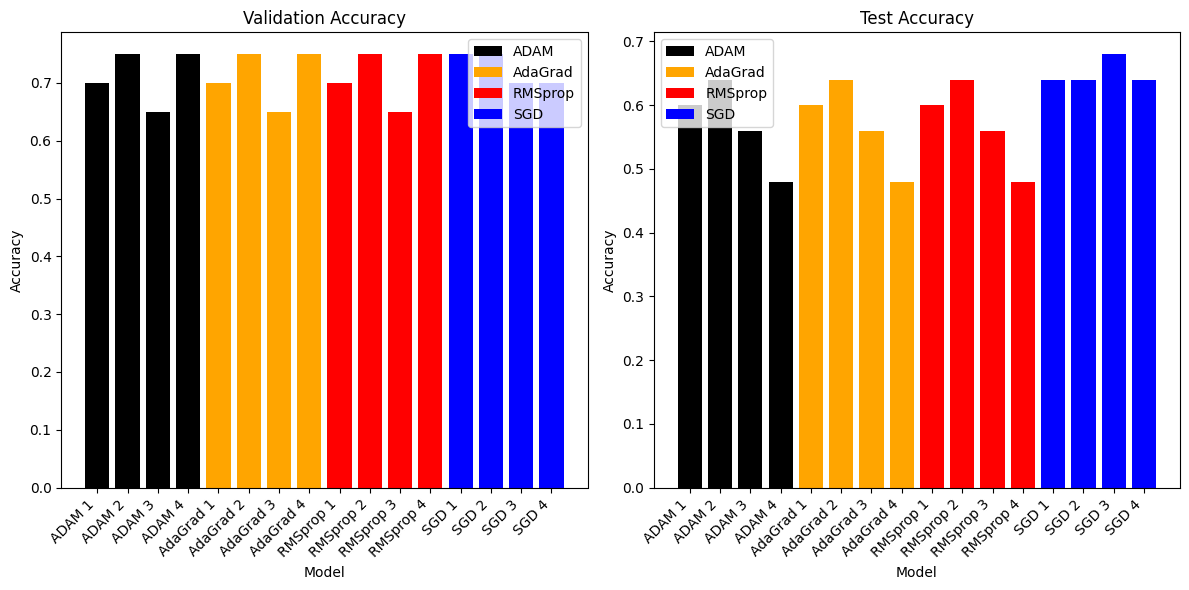

In [69]:
import matplotlib.pyplot as plt

# Membuat palet warna yang berbeda untuk setiap optimizer
colors = {'SGD': 'blue', 'Adam': 'green', 'AdaGrad': 'orange', 'RMSprop': 'red'}

# Membuat subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Grafik akurasi validasi
for optimizer, group in results_df.groupby('Optimizer'):
    axs[0].bar(group['Optimizer'] + ' ' + group['Hidden Layers'].astype(str), group['Validation Accuracy'], color=colors.get(optimizer, 'black'), label=optimizer)
axs[0].set_title('Validation Accuracy')
axs[0].set_xlabel('Model', fontsize=10)  # Penyesuaian ukuran font
axs[0].set_ylabel('Accuracy')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')  # Rotasi label sumbu x
axs[0].legend()

# Grafik akurasi pengujian
for optimizer, group in results_df.groupby('Optimizer'):
    axs[1].bar(group['Optimizer'] + ' ' + group['Hidden Layers'].astype(str), group['Test Accuracy'], color=colors.get(optimizer, 'black'), label=optimizer)
axs[1].set_title('Test Accuracy')
axs[1].set_xlabel('Model', fontsize=10)  # Penyesuaian ukuran font
axs[1].set_ylabel('Accuracy')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')  # Rotasi label sumbu x
axs[1].legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()


In [70]:
from IPython.display import display

# Menampilkan DataFrame
display(results_df)


,Optimizer,Hidden Layers,Validation Accuracy,Test Accuracy
0,SGD,1,0.75,0.64
1,SGD,2,0.75,0.64
2,SGD,3,0.70,0.68
3,SGD,4,0.70,0.64
4,ADAM,1,0.70,0.60
5,ADAM,2,0.75,0.64
6,ADAM,3,0.65,0.56
7,ADAM,4,0.75,0.48
8,AdaGrad,1,0.70,0.60
9,AdaGrad,2,0.75,0.64


In [71]:
# Temukan indeks baris dengan akurasi pengujian tertinggi dan terendah
best_model_idx = results_df['Test Accuracy'].idxmax()
worst_model_idx = results_df['Test Accuracy'].idxmin()

# Dapatkan informasi tentang model dengan akurasi pengujian tertinggi dan terendah
best_model_info = results_df.loc[best_model_idx]
worst_model_info = results_df.loc[worst_model_idx]

print("Model dengan akurasi pengujian tertinggi:")
print(best_model_info)
print("\nModel dengan akurasi pengujian terendah:")
print(worst_model_info)


Model dengan akurasi pengujian tertinggi:
Optimizer               SGD
Hidden Layers             3
Validation Accuracy     0.7
Test Accuracy          0.68
Name: 2, dtype: object

Model dengan akurasi pengujian terendah:
Optimizer              ADAM
Hidden Layers             4
Validation Accuracy    0.75
Test Accuracy          0.48
Name: 7, dtype: object


## 3. Menambahkan Dropout 50%

### 3.A Menambahkan Dropout di salah satu layer

In [72]:
# Function to build the DNN model with one hidden layer
def build_model_one_hidden_with_dropout():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(1000, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Hidden layer with 1000 neurons and ReLU activation
        tf.keras.layers.Dropout(0.5),  # Dropout layer with dropout rate of 50%
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='sigmoid')          # Output layer with sigmoid activation
    ])
    return model

# Function to build the DNN model with two hidden layer
def build_model_two_hidden_with_dropout():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(500, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # 1st hidden layer with 500 neurons and ReLU activation
        tf.keras.layers.Dense(500, activation='relu'),                                   # 2nd hidden layer with 500 neurons and ReLU activation
        tf.keras.layers.Dropout(0.5),  # Dropout layer with dropout rate of 50%
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='sigmoid')         # Output layer with sigmoid activation
    ])
    return model

# Function to build the DNN model with three hidden layer
def build_model_three_hidden_with_dropout():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(250, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # First hidden layer with 250 neurons and ReLU activation
        tf.keras.layers.Dense(250, activation='relu'),                                   # Second hidden layer with 250 neurons and ReLU activation
        tf.keras.layers.Dense(250, activation='relu'),                                   # Third hidden layer with 250 neurons and ReLU activation
        tf.keras.layers.Dropout(0.5),  # Dropout layer with dropout rate of 50%
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='sigmoid')         # Output layer with sigmoid activation
    ])
    return model

# Function to build the DNN model with four hidden layer
def build_model_four_hidden_with_dropout():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # First hidden layer with 100 neurons and ReLU activation
        tf.keras.layers.Dense(100, activation='relu'),                                   # Second hidden layer with 100 neurons and ReLU activation
        tf.keras.layers.Dense(100, activation='relu'),                                   # Third hidden layer with 100 neurons and ReLU activation
        tf.keras.layers.Dense(100, activation='relu'),                                   # Fourth hidden layer with 100 neurons and ReLU activation
        tf.keras.layers.Dropout(0.5),  # Dropout layer with dropout rate of 50%
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='sigmoid')         # Output layer with sigmoid activation
    ])
    return model

In [73]:
# Build the DNN model
model_one_hidden_layer_with_dropout = build_model_one_hidden_with_dropout()
model_two_hidden_layer_with_dropout = build_model_two_hidden_with_dropout()
model_three_hidden_layer_with_dropout = build_model_three_hidden_with_dropout()
model_four_hidden_layer_with_dropout = build_model_four_hidden_with_dropout()

#### SGD - Train and evaluate the model with 1 hidden Layer

In [74]:
# Melatih model dengan data pelatihan
# optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=0.01)  # Define the optimizer with learning rate
model_one_hidden_layer_with_dropout.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_one_hidden_layer_with_dropout.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 104ms/step - loss: 1.7538 - accuracy: 0.5316 - val_loss: 0.8045 - val_accuracy: 0.8000
Epoch 2/100
8/8 [==============================] - 1s 118ms/step - loss: 0.1512 - accuracy: 0.9367 - val_loss: 1.6400 - val_accuracy: 0.7000
Epoch 3/100
8/8 [==============================] - 1s 121ms/step - loss: 0.1117 - accuracy: 0.9620 - val_loss: 1.1964 - val_accuracy: 0.7500
Epoch 4/100
8/8 [==============================] - 1s 115ms/step - loss: 0.0274 - accuracy: 0.9873 - val_loss: 0.9561 - val_accuracy: 0.7500
Epoch 5/100
8/8 [==============================] - 1s 76ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.9978 - val_accuracy: 0.8000
Epoch 6/100
8/8 [==============================] - 1s 80ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.0849 - val_accuracy: 0.8000
Epoch 7/100
8/8 [==============================] - 1s 79ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 1.1882 - val_accuracy: 0.8000
Epoch 8/100
8/8 

In [75]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_one_hidden_layer_with_dropout.evaluate(X_val_scaled, y_val)
print("Model Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_one_hidden_layer_with_dropout  # Misalnya, model pertama dianggap sebagai model terbaik
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 155ms/step - loss: 1.1931 - accuracy: 0.7000
Model Validation Accuracy: 0.699999988079071
1/1 [==============================] - 0s 46ms/step - loss: 1.4047 - accuracy: 0.6000
Best Model Test Accuracy: 0.6000000238418579


In [76]:
update_results('SGD+D', 1, val_acc, test_acc)
print(results_df)

   Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0        SGD             1                 0.75           0.64
1        SGD             2                 0.75           0.64
2        SGD             3                 0.70           0.68
3        SGD             4                 0.70           0.64
4       ADAM             1                 0.70           0.60
5       ADAM             2                 0.75           0.64
6       ADAM             3                 0.65           0.56
7       ADAM             4                 0.75           0.48
8    AdaGrad             1                 0.70           0.60
9    AdaGrad             2                 0.75           0.64
10   AdaGrad             3                 0.65           0.56
11   AdaGrad             4                 0.75           0.48
12   RMSprop             1                 0.70           0.60
13   RMSprop             2                 0.75           0.64
14   RMSprop             3                 0.65        

### 3.B Menambahkan Dropout di semua layer

#### SGD - Train and evaluate the model with 2 hidden Layer

In [77]:
# Melatih model dengan data pelatihan
model_two_hidden_layer_with_dropout.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_two_hidden_layer_with_dropout.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 63ms/step - loss: 1.0325 - accuracy: 0.5949 - val_loss: 0.5416 - val_accuracy: 0.7500
Epoch 2/100
8/8 [==============================] - 0s 34ms/step - loss: 0.2462 - accuracy: 0.8987 - val_loss: 0.6479 - val_accuracy: 0.7000
Epoch 3/100
8/8 [==============================] - 0s 36ms/step - loss: 0.0892 - accuracy: 0.9620 - val_loss: 0.6011 - val_accuracy: 0.7500
Epoch 4/100
8/8 [==============================] - 0s 38ms/step - loss: 0.0619 - accuracy: 1.0000 - val_loss: 0.5605 - val_accuracy: 0.7500
Epoch 5/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 0.5734 - val_accuracy: 0.7500
Epoch 6/100
8/8 [==============================] - 0s 32ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.5993 - val_accuracy: 0.7500
Epoch 7/100
8/8 [==============================] - 0s 32ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.5973 - val_accuracy: 0.7500
Epoch 8/100
8/8 [===

#### SGD - Train and evaluate the model with 3 hidden Layer

In [80]:
# Melatih model dengan data pelatihan
model_three_hidden_layer_with_dropout.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_three_hidden_layer_with_dropout.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 62ms/step - loss: 0.8170 - accuracy: 0.5696 - val_loss: 0.4458 - val_accuracy: 0.8000
Epoch 2/100
8/8 [==============================] - 0s 29ms/step - loss: 0.2749 - accuracy: 0.9367 - val_loss: 0.4466 - val_accuracy: 0.8500
Epoch 3/100
8/8 [==============================] - 0s 28ms/step - loss: 0.1209 - accuracy: 0.9873 - val_loss: 0.4134 - val_accuracy: 0.8500
Epoch 4/100
8/8 [==============================] - 0s 30ms/step - loss: 0.1288 - accuracy: 0.9747 - val_loss: 0.4473 - val_accuracy: 0.8000
Epoch 5/100
8/8 [==============================] - 0s 33ms/step - loss: 0.0653 - accuracy: 1.0000 - val_loss: 0.4208 - val_accuracy: 0.8000
Epoch 6/100
8/8 [==============================] - 0s 31ms/step - loss: 0.0557 - accuracy: 0.9873 - val_loss: 0.4516 - val_accuracy: 0.7500
Epoch 7/100
8/8 [==============================] - 0s 29ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 0.4430 - val_accuracy: 0.7500
Epoch 8/100
8/8 [===

In [78]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_two_hidden_layer_with_dropout.evaluate(X_val_scaled, y_val)
print("Model 2 Hidden Layer SGD Optimizer Validation Accuracy:", val_acc)

# 5. Pilih model terbaik berdasarkan kinerja validasi
best_model = model_two_hidden_layer_with_dropout  # Misalnya, model pertama dianggap sebagai model terbaik

# 6. Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 153ms/step - loss: 0.9057 - accuracy: 0.7500
Model 2 Hidden Layer SGD Optimizer Validation Accuracy: 0.75
1/1 [==============================] - 0s 38ms/step - loss: 0.9844 - accuracy: 0.6000
Best Model Test Accuracy: 0.6000000238418579


In [79]:
update_results('SGD+D', 2, val_acc, test_acc)
print(results_df)

   Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0        SGD             1                 0.75           0.64
1        SGD             2                 0.75           0.64
2        SGD             3                 0.70           0.68
3        SGD             4                 0.70           0.64
4       ADAM             1                 0.70           0.60
5       ADAM             2                 0.75           0.64
6       ADAM             3                 0.65           0.56
7       ADAM             4                 0.75           0.48
8    AdaGrad             1                 0.70           0.60
9    AdaGrad             2                 0.75           0.64
10   AdaGrad             3                 0.65           0.56
11   AdaGrad             4                 0.75           0.48
12   RMSprop             1                 0.70           0.60
13   RMSprop             2                 0.75           0.64
14   RMSprop             3                 0.65        

In [81]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_three_hidden_layer_with_dropout.evaluate(X_val_scaled, y_val)
print("Model 3 Hidden Layer SGD Optimizer Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_three_hidden_layer_with_dropout  # Misalnya, model pertama dianggap sebagai model terbaik

# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 152ms/step - loss: 0.6483 - accuracy: 0.7500
Model 3 Hidden Layer SGD Optimizer Validation Accuracy: 0.75
1/1 [==============================] - 0s 31ms/step - loss: 1.0951 - accuracy: 0.5600
Best Model Test Accuracy: 0.5600000023841858


In [82]:
update_results('SGD+D', 3, val_acc, test_acc)
print(results_df)

   Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0        SGD             1                 0.75           0.64
1        SGD             2                 0.75           0.64
2        SGD             3                 0.70           0.68
3        SGD             4                 0.70           0.64
4       ADAM             1                 0.70           0.60
5       ADAM             2                 0.75           0.64
6       ADAM             3                 0.65           0.56
7       ADAM             4                 0.75           0.48
8    AdaGrad             1                 0.70           0.60
9    AdaGrad             2                 0.75           0.64
10   AdaGrad             3                 0.65           0.56
11   AdaGrad             4                 0.75           0.48
12   RMSprop             1                 0.70           0.60
13   RMSprop             2                 0.75           0.64
14   RMSprop             3                 0.65        

#### SGD - Train and evaluate the model with 4 hidden Layer

In [83]:
# Melatih model dengan data pelatihan
model_four_hidden_layer_with_dropout.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_four_hidden_layer_with_dropout.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 38ms/step - loss: 0.7113 - accuracy: 0.5570 - val_loss: 0.5864 - val_accuracy: 0.8500
Epoch 2/100
8/8 [==============================] - 0s 15ms/step - loss: 0.4131 - accuracy: 0.8608 - val_loss: 0.5437 - val_accuracy: 0.8000
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 0.3369 - accuracy: 0.9114 - val_loss: 0.5072 - val_accuracy: 0.8000
Epoch 4/100
8/8 [==============================] - 0s 14ms/step - loss: 0.2014 - accuracy: 0.9620 - val_loss: 0.5025 - val_accuracy: 0.8000
Epoch 5/100
8/8 [==============================] - 0s 13ms/step - loss: 0.1466 - accuracy: 0.9873 - val_loss: 0.4975 - val_accuracy: 0.8000
Epoch 6/100
8/8 [==============================] - 0s 14ms/step - loss: 0.1201 - accuracy: 1.0000 - val_loss: 0.5147 - val_accuracy: 0.8000
Epoch 7/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0957 - accuracy: 0.9873 - val_loss: 0.5341 - val_accuracy: 0.7500
Epoch 8/100
8/8 [===

In [84]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_four_hidden_layer_with_dropout.evaluate(X_val_scaled, y_val)
print("Model 3 Hidden Layer SGD Optimizer Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_four_hidden_layer_with_dropout  # Misalnya, model pertama dianggap sebagai model terbaik

# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 154ms/step - loss: 1.1056 - accuracy: 0.8000
Model 3 Hidden Layer SGD Optimizer Validation Accuracy: 0.800000011920929
1/1 [==============================] - 0s 29ms/step - loss: 1.4271 - accuracy: 0.5200
Best Model Test Accuracy: 0.5199999809265137


In [85]:
update_results('SGD+D', 4, val_acc, test_acc)
print(results_df)

   Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0        SGD             1                 0.75           0.64
1        SGD             2                 0.75           0.64
2        SGD             3                 0.70           0.68
3        SGD             4                 0.70           0.64
4       ADAM             1                 0.70           0.60
5       ADAM             2                 0.75           0.64
6       ADAM             3                 0.65           0.56
7       ADAM             4                 0.75           0.48
8    AdaGrad             1                 0.70           0.60
9    AdaGrad             2                 0.75           0.64
10   AdaGrad             3                 0.65           0.56
11   AdaGrad             4                 0.75           0.48
12   RMSprop             1                 0.70           0.60
13   RMSprop             2                 0.75           0.64
14   RMSprop             3                 0.65        

### 3.C Hasil Penambahan Dropout 50%

In [86]:
from IPython.display import display

# Menampilkan DataFrame
display(results_df)

,Optimizer,Hidden Layers,Validation Accuracy,Test Accuracy
0,SGD,1,0.75,0.64
1,SGD,2,0.75,0.64
2,SGD,3,0.70,0.68
3,SGD,4,0.70,0.64
4,ADAM,1,0.70,0.60
5,ADAM,2,0.75,0.64
6,ADAM,3,0.65,0.56
7,ADAM,4,0.75,0.48
8,AdaGrad,1,0.70,0.60
9,AdaGrad,2,0.75,0.64


In [87]:
# Temukan indeks baris dengan akurasi pengujian tertinggi dan terendah
best_model_idx = results_df['Test Accuracy'].idxmax()
worst_model_idx = results_df['Test Accuracy'].idxmin()

# Dapatkan informasi tentang model dengan akurasi pengujian tertinggi dan terendah
best_model_info = results_df.loc[best_model_idx]
worst_model_info = results_df.loc[worst_model_idx]

print("Model dengan akurasi pengujian tertinggi:")
print(best_model_info)
print("\nModel dengan akurasi pengujian terendah:")
print(worst_model_info)

Model dengan akurasi pengujian tertinggi:
Optimizer               SGD
Hidden Layers             3
Validation Accuracy     0.7
Test Accuracy          0.68
Name: 2, dtype: object

Model dengan akurasi pengujian terendah:
Optimizer              ADAM
Hidden Layers             4
Validation Accuracy    0.75
Test Accuracy          0.48
Name: 7, dtype: object
